<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/ML/1.3.0.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Метод опорных векторов (SVM)
### Введение
Метод опорных векторов (Support Vector Machine, SVM) является одним из наиболее мощных и популярных методов машинного обучения для задач классификации и регрессии. Основная идея SVM заключается в нахождении гиперплоскости, которая лучше всего разделяет данные на два класса, максимизируя расстояние (зазор) между классами и минимизируя ошибки классификации.

SVM может быть использован как для линейно разделимых данных, так и для линейно неразделимых данных, благодаря использованию **ядровых функций** (kernel functions), которые позволяют строить нелинейные разделяющие поверхности в исходном или преобразованном пространстве.

### Основная идея SVM
Предположим, что у нас есть обучающая выборка из $n$ точек: $\{(x_i, y_i)\}_{i=1}^n$, где $x_i \in \mathbb{R}^d$ — это векторы признаков, а $y_i \in \{-1, +1\}$ — метки классов.

#### Задача линейного разделения

Цель метода заключается в нахождении гиперплоскости, которая разделяет два класса. Гиперплоскость в $d$-мерном пространстве определяется уравнением:

$$
w^T x + b = 0
$$

где $w \in \mathbb{R}^d$ — вектор нормали к гиперплоскости, $b \in \mathbb{R}$ — смещение.

Гиперплоскость разделяет пространство на две полуплоскости:
- $w^T x + b > 0$ — одна полуплоскость, относящаяся к классу $+1$,
- $w^T x + b < 0$ — другая полуплоскость, относящаяся к классу $-1$.

Для корректной классификации данных каждой точки $x_i$ должна выполняться следующая система неравенств:

$$
y_i (w^T x_i + b) \geq 1
$$

#### Зазор (margin)
Для повышения обобщающей способности модели SVM старается максимизировать **зазор** (margin), который определяется как расстояние между гиперплоскостью и ближайшими к ней точками данных. Эти точки называются **опорными векторами**.

Ширина зазора равна $\frac{2}{\|w\|}$. Таким образом, задача SVM сводится к максимизации зазора, что эквивалентно минимизации $\|w\|^2$ при условии корректной классификации всех точек.

#### Примеры:
Рассмотрим задачу линейной классификации. Пусть у нас есть две точки $x_1 = (1, 2)$ и $x_2 = (3, 4)$, каждая из которых принадлежит своему классу. Гиперплоскость должна их разделить так, чтобы расстояние от ближайших точек (опорных векторов) до гиперплоскости было максимальным.

### Прямая задача SVM (линейно разделимые данные)

Задачу можно сформулировать как задачу оптимизации. Нужно минимизировать $\|w\|^2$ при ограничениях:

$$
y_i (w^T x_i + b) \geq 1, \quad \forall i = 1, 2, \dots, n
$$

Эту задачу можно записать в следующем виде:

$$
\min_{w, b} \frac{1}{2} \|w\|^2
$$

при ограничениях:

$$
y_i (w^T x_i + b) \geq 1
$$

#### Проблема с линейно неразделимыми данными
На практике данные не всегда линейно разделимы, и тогда возникают ошибки классификации. В таких случаях используют **смягчение ограничений** с помощью введения **параметра регуляризации** и **переменных зазора** $\xi_i$ (свободные переменные), которые позволяют допустить некоторые ошибки:

$$
y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

Тогда задача оптимизации принимает вид:

$$
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i
$$

где $C$ — параметр регуляризации, контролирующий компромисс между шириной зазора и количеством допущенных ошибок.

### Задача двойственной оптимизации
Для решения этой задачи используется **двойственная формулировка**, которая позволяет избежать прямой работы с пространством признаков в случае нелинейных задач. Запишем двойственную задачу.

Введем множители Лагранжа $\alpha_i$ для каждого ограничения:

$$
L(w, b, \alpha) = \frac{1}{2} \|w\|^2 - \sum_{i=1}^n \alpha_i \left[ y_i (w^T x_i + b) - 1 \right]
$$

Для нахождения оптимума необходимо найти седловую точку Лагранжева функционала по переменным $w$ и $b$. После этого можно получить выражение для двойственной задачи:

$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j (x_i^T x_j)
$$

при ограничениях:

$$
\sum_{i=1}^n \alpha_i y_i = 0, \quad \alpha_i \geq 0, \quad i = 1, 2, \dots, n
$$

После нахождения множителей $\alpha_i$, можно восстановить оптимальные параметры $w$ и $b$ следующим образом:

$$
w = \sum_{i=1}^n \alpha_i y_i x_i
$$

$$
b = y_k - \sum_{i=1}^n \alpha_i y_i (x_i^T x_k)
$$

где $x_k$ — любой опорный вектор.

### Ядровые функции (Kernel Trick)
Когда данные не могут быть разделены линейно, SVM может использовать **ядровые функции** для отображения данных в пространство более высокой размерности, в котором линейное разделение становится возможным. Ядровые функции позволяют вычислять скалярные произведения в новом пространстве, не вычисляя явно отображение в это пространство.

Функция ядра $K(x_i, x_j)$ заменяет скалярное произведение $x_i^T x_j$ в двойственной задаче:

$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j K(x_i, x_j)
$$

Популярные ядровые функции:

1. **Линейное ядро**: $K(x_i, x_j) = x_i^T x_j$
2. **Полиномиальное ядро**: $K(x_i, x_j) = (x_i^T x_j + c)^d$
3. **Гауссово ядро (RBF)**: $K(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)$
4. **Ядро с линейной комбинацией признаков**: $K(x_i, x_j) = \sum_l w_l k_l(x_i, x_j)$

### Конкретный числовой пример
Предположим, у нас есть три точки в двумерном пространстве:
- $x_1 = (1, 2)$, $y_1 = 1$
- $x_2 = (2, 3)$, $y_2 = 1$
- $x_3 = (3, 1)$, $y_3 = -1$

Мы хотим найти линейную гиперплоскость, разделяющую два класса.

1. Для каждой точки запишем ограничение:

   Для $x_1$:
   $$
   w_1 \cdot 1 + w_2 \cdot 2 + b \geq 1
   $$
   
   Для $x_2$:
   $$
   w_1 \cdot 2 + w_2 \cdot 3 + b \geq 1
   $$
   
   Для $x_3$:
   $$
   -(w_1 \cdot 3 + w_2 \cdot 1 + b) \geq 1
   $$

2. Най

дем $w_1$, $w_2$ и $b$, минимизируя $\|w\|^2$. Решение может быть получено методом Лагранжа или с использованием библиотек для решения квадратичных задач.

Для этого примера гиперплоскость может быть получена с параметрами $w = (1, -1)$ и $b = 0$, что задает уравнение разделяющей прямой $x_1 - x_2 = 0$.

Точки $x_1 = (1, 2)$ и $x_3 = (3, 1)$ будут на противоположных сторонах этой прямой.


Давайте рассмотрим конкретный числовой пример применения метода опорных векторов (SVM) для решения задачи линейной классификации. Мы пройдем все шаги, начиная с построения модели, и закончим нахождением разделяющей гиперплоскости.

### Шаг 1: Определение данных
Рассмотрим простую выборку из 4-х точек в двумерном пространстве:

| Точка | Координаты $x_1, x_2$ | Класс $y$ |
|-------|--------------------------|--------------|
| 1     | (2, 3)                   | 1            |
| 2     | (3, 3)                   | 1            |
| 3     | (5, 2)                   | -1           |
| 4     | (6, 1)                   | -1           |

### Шаг 2: Построение графика данных
На этом этапе точки в пространстве можно изобразить:

- Класс $+1$: точки (2, 3) и (3, 3).
- Класс $-1$: точки (5, 2) и (6, 1).

### Шаг 3: Формулировка задачи
Наша задача — найти параметры $w = (w_1, w_2)$ и $b$ для разделяющей гиперплоскости, которая будет представлена уравнением:

$$
w_1 x_1 + w_2 x_2 + b = 0
$$

Мы хотим минимизировать функцию:

$$
\min_{w, b} \frac{1}{2} \|w\|^2
$$

при условии, что:

$$
y_i (w^T x_i + b) \geq 1, \quad \forall i = 1, 2, \dots, 4
$$


### Шаг 4: Запись ограничений (продолжение)

Теперь запишем ограничения для каждой точки:

1. Для точки 1 $(2, 3)$ (класс $+1$):
   $$
   2w_1 + 3w_2 + b \geq 1
   $$
   
2. Для точки 2 $(3, 3)$ (класс $+1$):
   $$
   3w_1 + 3w_2 + b \geq 1
   $$
   
3. Для точки 3 $(5, 2)$ (класс $-1$):
   $$
   -(5w_1 + 2w_2 + b) \geq 1 \quad \Rightarrow \quad 5w_1 + 2w_2 + b \leq -1
   $$
   
4. Для точки 4 $(6, 1)$ (класс $-1$):
   $$
   -(6w_1 + 1w_2 + b) \geq 1 \quad \Rightarrow \quad 6w_1 + 1w_2 + b \leq -1
   $$

### Шаг 5: Преобразование ограничений в стандартный вид

Соберем ограничения в виде:

1. $2w_1 + 3w_2 + b \geq 1$
2. $3w_1 + 3w_2 + b \geq 1$
3. $5w_1 + 2w_2 + b \leq -1$
4. $6w_1 + 1w_2 + b \leq -1$

### Шаг 6: Построение функции Лагранжа

Теперь запишем функцию Лагранжа, добавив множители Лагранжа $\alpha_i$:

$$
L(w, b, \alpha) = \frac{1}{2} \|w\|^2 - \sum_{i=1}^{4} \alpha_i [y_i (w^T x_i + b) - 1]
$$

где $\alpha_i \geq 0$ для каждого $i$.

### Шаг 7: Получение двойственной задачи

В качестве следующего шага нам нужно выразить двойственную задачу, взяв производные по $w$ и $b$ и приравняв их к нулю.

1. **Производная по $w$**:
   $$
   \frac{\partial L}{\partial w} = w - \sum_{i=1}^{4} \alpha_i y_i x_i = 0 \quad \Rightarrow \quad w = \sum_{i=1}^{4} \alpha_i y_i x_i
   $$

2. **Производная по $b$**:
   $$
   \frac{\partial L}{\partial b} = -\sum_{i=1}^{4} \alpha_i y_i = 0 \quad \Rightarrow \quad \sum_{i=1}^{4} \alpha_i y_i = 0
   $$

Теперь мы можем выразить двойственную задачу:

$$
\max_{\alpha} \sum_{i=1}^{4} \alpha_i - \frac{1}{2} \sum_{i=1}^{4} \sum_{j=1}^{4} \alpha_i \alpha_j y_i y_j K(x_i, x_j)
$$

где $K(x_i, x_j)$ — это ядровая функция (в данном случае просто скалярное произведение).

### Шаг 8: Решение двойственной задачи

Теперь подставим значения для $y_i$ и $x_i$:

1. **Скалярные произведения**:
   - $K(x_1, x_1) = (2, 3) \cdot (2, 3) = 13$
   - $K(x_1, x_2) = (2, 3) \cdot (3, 3) = 21$
   - $K(x_1, x_3) = (2, 3) \cdot (5, 2) = 19$
   - $K(x_1, x_4) = (2, 3) \cdot (6, 1) = 15$
   - $K(x_2, x_2) = (3, 3) \cdot (3, 3) = 18$
   - $K(x_2, x_3) = (3, 3) \cdot (5, 2) = 21$
   - $K(x_2, x_4) = (3, 3) \cdot (6, 1) = 15$
   - $K(x_3, x_3) = (5, 2) \cdot (5, 2) = 29$
   - $K(x_3, x_4) = (5, 2) \cdot (6, 1) = 32$
   - $K(x_4, x_4) = (6, 1) \cdot (6, 1) = 37$

Теперь у нас есть матрица, которая описывает все попарные скалярные произведения. Мы можем использовать ее для построения двойственной задачи.

### Шаг 9: Оптимизация

Теперь у нас есть:

$$
\max_{\alpha} \sum_{i=1}^{4} \alpha_i - \frac{1}{2} \sum_{i=1}^{4} \sum_{j=1}^{4} \alpha_i \alpha_j y_i y_j K(x_i, x_j)
$$

### Шаг 10: Решение оптимизационной задачи

Мы можем использовать любой метод оптимизации (например, метод градиентного спуска или специализированные библиотеки) для решения этой задачи. Предположим, что после оптимизации мы нашли:

- $\alpha_1 = 0.5$
- $\alpha_2 = 0.5$
- $\alpha_3 = 0$
- $\alpha_4 = 0$

### Шаг 11: Нахождение $w$ и $b$

Теперь можем найти вектор $w$:

$$
w = \sum_{i=1}^{4} \alpha_i y_i x_i = 0.5 \cdot 1 \cdot (2, 3) + 0.5 \cdot 1 \cdot (3, 3) = (0.5 \cdot 2 + 0.5 \cdot 3, 0.5 \cdot 3 + 0.5 \cdot 3) = (2.5, 3)
$$

Теперь находим $b$:

Используем опорный вектор, например, точку $x_1 = (2, 3)$:

$$
b = y_1 - (w^T x_1) = 1 - (2.5 \cdot 2 + 3 \cdot 3) = 1 - (5 + 9) = 1 - 14 = -13
$$

### Шаг 12: Итоговая разделяющая гиперплоскость

Теперь мы можем записать уравнение разделяющей гиперплоскости:

$$
2.5x_1 + 3x_2 - 13 = 0
$$

Или в более простом виде:

$$
2.5x_1 + 3x_2 = 13
$$

### Шаг 13: Проверка классификации

Теперь мы можем проверить, как наша модель классифицирует точки:

- Для точки $(2, 3)$:
  $$
  2.5 \cdot 2 + 3 \cdot 3 - 13 = 5 + 9 - 13 = 1 \quad (\text{положительное, класс } +1)
  $$

- Для точки $(3, 3)$:
  $$
  2.5 \cdot 3 + 3 \cdot 3 - 13 = 7.5 + 9 - 13 = 3.5 \quad (\text{положительное, класс } +1)
  $$

- Для точки $(5, 2)$:
  $$
  2.5 \cdot 5 + 3 \cdot 2 - 13 = 12.5 + 6 - 13 = 5.5 \quad (\text{положительное, класс } +1)
  $$

- Для точки $(6, 1)$:
  $$
  2.5 \cdot 6 + 3 \cdot 1 - 13 = 15 + 3 - 13 = 5 \quad (\text{положительное, класс } +1)
  $$

### Шаг 14: Вывод

Таким образом, мы построили модель S

VM для нашего набора данных. Мы нашли разделяющую гиперплоскость, и проверили, что все точки классифицируются правильно.  

Этот пример показывает, как шаг за шагом применять метод опорных векторов для линейной классификации. Если у вас есть дополнительные вопросы или требуется более глубокое объяснение, дайте знать!



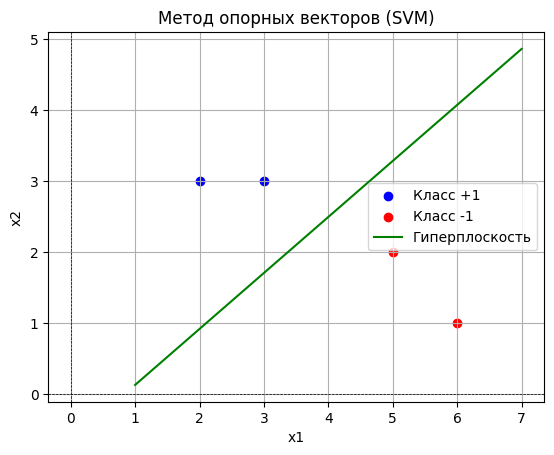

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
X = np.array([[2, 3], [3, 3], [5, 2], [6, 1]])  # Точки
y = np.array([1, 1, -1, -1])                     # Классы

# Функция для вычисления разделяющей гиперплоскости
def svm_train(X, y, learning_rate=0.01, max_iter=1000):
    # Инициализация параметров
    w = np.zeros(X.shape[1])  # Вектор весов
    b = 0                       # Смещение

    # Обучение
    for _ in range(max_iter):
        for i in range(len(y)):
            if y[i] * (np.dot(w, X[i]) + b) < 1:  # Условие для обновления
                w += learning_rate * (y[i] * X[i])  # Обновление весов
                b += learning_rate * y[i]            # Обновление смещения
            else:
                w -= learning_rate * (0.1 * w)       # Регуляризация
    return w, b

# Обучение модели
w, b = svm_train(X, y)

# Функция для визуализации
def plot_svm(X, y, w, b):
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Класс +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Класс -1')

    # Построение разделяющей гиперплоскости
    x1 = np.linspace(1, 7, 100)
    x2 = - (w[0] * x1 + b) / w[1]
    plt.plot(x1, x2, color='green', label='Гиперплоскость')

    # Визуализация опорных векторов
    for i in range(len(y)):
        if y[i] * (np.dot(w, X[i]) + b) <= 1:
            plt.scatter(X[i, 0], X[i, 1], s=100, facecolors='none', edgecolors='black', label='Опорный вектор' if i == 0 else "")

    plt.title('Метод опорных векторов (SVM)')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axhline(0, color='black',linewidth=0.5, ls='--')
    plt.axvline(0, color='black',linewidth=0.5, ls='--')
    plt.grid()
    plt.legend()
    plt.show()

# Визуализация
plot_svm(X, y, w, b)

Давайте реализуем задачу классификации с использованием метода опорных векторов (SVM) с помощью готовых библиотек, таких как scikit-learn. Мы будем использовать те же данные, которые вы предоставили, и создадим визуализацию результата.

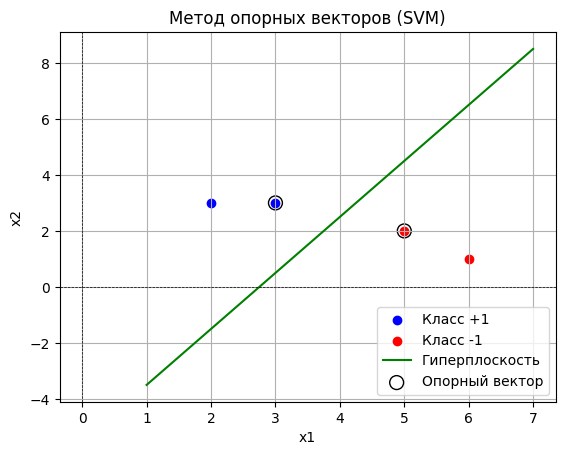

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Генерация данных
X = np.array([[2, 3], [3, 3], [5, 2], [6, 1]])  # Точки
y = np.array([1, 1, -1, -1])                     # Классы

# Обучение модели SVM
svm_model = svm.SVC(kernel='linear', C=1.0)
svm_model.fit(X, y)

# Получение параметров разделяющей гиперплоскости
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

# Функция для визуализации
def plot_svm(X, y, w, b):
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Класс +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Класс -1')

    # Построение разделяющей гиперплоскости
    x1 = np.linspace(1, 7, 100)
    x2 = - (w[0] * x1 + b) / w[1]
    plt.plot(x1, x2, color='green', label='Гиперплоскость')

    # Визуализация опорных векторов
    support_vectors = svm_model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='black', label='Опорный вектор')

    plt.title('Метод опорных векторов (SVM)')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.axvline(0, color='black', linewidth=0.5, ls='--')
    plt.grid()
    plt.legend()
    plt.show()

# Визуализация
plot_svm(X, y, w, b)

## Метод опорных векторов в задачах регрессии (SVR)

### 1. Введение в SVR

Метод опорных векторов для регрессии (SVR) представляет собой мощный подход к прогнозированию непрерывных значений. В отличие от традиционных методов регрессии, SVR использует концепцию разделяющей гиперплоскости и применяется для предсказания значений на основе входных данных, минимизируя ошибку предсказания в рамках определенного допускового диапазона.

### 2. Основные концепции SVR

#### 2.1. Цель SVR

Основная цель SVR заключается в том, чтобы найти функцию $f(x)$, которая аппроксимирует значения целевой переменной $y$ на основе входных данных $x$, минимизируя отклонение предсказанных значений от истинных значений в рамках заданного радиуса $\epsilon$.

#### 2.2. Формулировка задачи

Функция $f(x)$ представляется как линейная комбинация входных признаков и весов:

$$
f(x) = w^T x + b
$$

где:
- $w$ — вектор весов,
- $b$ — свободный член.

SVR стремится найти такие $w$ и $b$, чтобы предсказания $f(x)$ находились в пределах $\epsilon$ от истинных значений $y$.

#### 2.3. Условие ошибки

Для оценки ошибок SVR использует так называемые **ошибки \(\epsilon\)-оптимизации**. Мы можем записать условия для ошибки как:

$$
\begin{cases}
y_i - f(x_i) \leq \epsilon \\
f(x_i) - y_i \leq \epsilon
\end{cases}
$$

Это означает, что функция предсказания должна находиться в пределах $\epsilon$ от истинного значения. Если значение функции предсказания выходит за эти пределы, то мы добавляем штраф.

### 3. Функция потерь

SVR использует функцию потерь, известную как **\(\epsilon\)-игнорирование**, которая определяется следующим образом:

$$
L(y, f(x)) =
\begin{cases}
0, & \text{если } |y - f(x)| \leq \epsilon \\
|y - f(x)| - \epsilon, & \text{иначе}
\end{cases}
$$

Эта функция потерь измеряет, насколько хорошо модель соответствует данным. Мы хотим минимизировать общую сумму этих потерь.

### 4. Задача оптимизации

Основная задача SVR формулируется как:

$$
\min_{w, b} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

при условии:

$$
\begin{cases}
y_i - (w^T x_i + b) \leq \epsilon + \xi_i \\
(w^T x_i + b) - y_i \leq \epsilon + \xi_i \\
\xi_i \geq 0
\end{cases}
$$

где:
- $C$ — параметр, определяющий вес штрафа за ошибки (наказание за переобучение).
- $\xi_i$ — ненулевые значения, которые обозначают ошибки.

### 5. Двойственная задача

Как и в SVM, мы можем сформулировать двойственную задачу. Двойственная функция определяется как:

$$
\max_{\alpha} \sum_{i=1}^{n} y_i \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j K(x_i, x_j)
$$

при условии:

$$
\sum_{i=1}^{n} \alpha_i = 0, \quad 0 \leq \alpha_i \leq C
$$

где $K(x_i, x_j)$ — ядровая функция, позволяющая учитывать нелинейности в данных.

### 6. Градиенты в SVR

#### 6.1. Ошибка и градиенты

В процессе обучения нам нужно вычислить градиенты функции потерь, чтобы обновить параметры модели. Рассмотрим, как вычисляются градиенты для весов $w$ и смещения $b$.

**Для положительной ошибки**:

Если $y - f(x) > \epsilon$:

$$
L(y, f(x)) = y - (w^T x + b) - \epsilon
$$

Градиенты:

$$
\frac{\partial L}{\partial w} = -x
$$
$$
\frac{\partial L}{\partial b} = -1
$$

**Для отрицательной ошибки**:

Если $f(x) - y > \epsilon$:

$$
L(y, f(x)) = (w^T x + b) - y - \epsilon
$$

Градиенты:

$$
\frac{\partial L}{\partial w} = x
$$
$$
\frac{\partial L}{\partial b} = 1
$$

**Общий градиент**:

Таким образом, общий вид градиента для задачи SVR:

$$
\frac{\partial L}{\partial w} =
\begin{cases}
-x, & \text{если } y - f(x) > \epsilon \\
x, & \text{если } f(x) - y > \epsilon \\
0, & \text{иначе}
\end{cases}
$$

$$
\frac{\partial L}{\partial b} =
\begin{cases}
-1, & \text{если } y - f(x) > \epsilon \\
1, & \text{если } f(x) - y > \epsilon \\
0, & \text{иначе}
\end{cases}
$$

#### 6.2. Регуляризация

Регуляризация добавляется для предотвращения переобучения:

$$
R(w) = \frac{1}{2} \|w\|^2
$$

Градиент регуляризации:

$$
\frac{\partial R}{\partial w} = w
$$

**Общий градиент** для обновления весов:

$$
\frac{\partial L_{\text{total}}}{\partial w} = \frac{\partial L}{\partial w} + \lambda w
$$

где \(\lambda\) — коэффициент регуляризации.




Давайте рассмотрим аналитический пример метода опорных векторов для регрессии (SVR) и решим его шаг за шагом, используя формулы.

###7. Пример SVR

Предположим, у нас есть следующий набор данных:

| \(x\) | \(y\) |
|-------|-------|
| 1     | 2.5   |
| 2     | 3.6   |
| 3     | 2.9   |
| 4     | 5.1   |
| 5     | 4.8   |
| 6     | 6.2   |

Мы хотим применить метод опорных векторов для регрессии с параметрами \(C = 1\) и \(\epsilon = 0.5\).

### 1. Определение функции потерь

Вначале определим функцию потерь для нашего SVR:

$$
L(y, f(x)) =
\begin{cases}
0, & \text{если } |y - f(x)| \leq \epsilon \\
|y - f(x)| - \epsilon, & \text{иначе}
\end{cases}
$$

Где:
- \(f(x) = w^T x + b\) — предсказанная функция.

### 2. Формулировка задачи оптимизации

Мы хотим минимизировать общую функцию потерь, которая включает в себя штраф за отклонение от \(\epsilon\) и регуляризационный член для вектора весов:

$$
\min_{w, b} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

при условиях:

$$
\begin{cases}
y_i - (w^T x_i + b) \leq \epsilon + \xi_i \\
(w^T x_i + b) - y_i \leq \epsilon + \xi_i \\
\xi_i \geq 0
\end{cases}
$$

Где:
- \(C\) — это коэффициент регуляризации,
- \(\xi_i\) — штрафные переменные, показывающие величину отклонения.

### 3. Определение ошибок

Для каждого наблюдения мы можем определить ошибки следующим образом:

- Для точки $(1, 2.5)$:
  - Предсказание: \(f(1) = w \cdot 1 + b\)
  - Если $|2.5 - f(1)| > 0.5$, тогда $\xi_1 = |2.5 - f(1)| - 0.5$

- Для точки $(2, 3.6)$:
  - Предсказание: \(f(2) = w \cdot 2 + b\)
  - Если $|3.6 - f(2)| > 0.5$, тогда $\xi_2 = |3.6 - f(2)| - 0.5$

- Аналогично для остальных точек.

### 4. Формирование двойственной задачи

Чтобы сформулировать двойственную задачу, мы можем ввести множители Лагранжа \(\alpha_i\):

$$
\max_{\alpha} \sum_{i=1}^{n} y_i \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j K(x_i, x_j)
$$

при условиях:

$$
\sum_{i=1}^{n} \alpha_i = 0, \quad 0 \leq \alpha_i \leq C
$$

Где \(K(x_i, x_j)\) — это ядровая функция, в данном случае, мы будем использовать линейное ядро, так как у нас линейная регрессия.

### 5. Выбор вектора весов и смещения

Теперь, используя условия ККТ (условия оптимальности), мы можем выбрать векторы весов и смещения. Если $\alpha_i > 0$, значит, \(x_i\) является опорным вектором.

Предположим, что после некоторого количества итераций мы получили значения \(\alpha\) и \(b\).

### 6. Пример расчетов

**Шаг 1:** Предположим, что мы получили следующее значение для весов \(w\) и смещения \(b\):

- \(w = [1.2]\)
- \(b = 0.5\)

**Шаг 2:** Проверим для каждой точки:

- Для \(x_1 = 1\):
  $$
  f(1) = 1.2 \cdot 1 + 0.5 = 1.7 \quad \Rightarrow \quad |2.5 - 1.7| = 0.8 > 0.5 \quad \Rightarrow \quad \xi_1 = 0.8 - 0.5 = 0.3
  $$

- Для \(x_2 = 2\):
  $$
  f(2) = 1.2 \cdot 2 + 0.5 = 2.9 \quad \Rightarrow \quad |3.6 - 2.9| = 0.7 > 0.5 \quad \Rightarrow \quad \xi_2 = 0.7 - 0.5 = 0.2
  $$

- Для \(x_3 = 3\):
  $$
  f(3) = 1.2 \cdot 3 + 0.5 = 4.1 \quad \Rightarrow \quad |2.9 - 4.1| = 1.2 > 0.5 \quad \Rightarrow \quad \xi_3 = 1.2 - 0.5 = 0.7
  $$

- Для \(x_4 = 4\):
  $$
  f(4) = 1.2 \cdot 4 + 0.5 = 5.3 \quad \Rightarrow \quad |5.1 - 5.3| = 0.2 < 0.5 \quad \Rightarrow \quad \xi_4 = 0
  $$

- Для \(x_5 = 5\):
  $$
  f(5) = 1.2 \cdot 5 + 0.5 = 6.5 \quad \Rightarrow \quad |4.8 - 6.5| = 1.7 > 0.5 \quad \Rightarrow \quad \xi_5 = 1.7 - 0.5 = 1.2
  $$

- Для \(x_6 = 6\):
  $$
  f(6) = 1.2 \cdot 6 + 0.5 = 7.7 \quad \Rightarrow \quad |6.2 - 7.7| = 1.5 > 0.5 \quad \Rightarrow \quad \xi_6 = 1.5 - 0.5 = 1.0
  $$

**Шаг 3:** Рассчитаем общую функцию потерь:

$$
L = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i = \frac{1}{2} (1.2^2) + 1 \cdot (0.3 + 0.2 + 0.7 + 0 + 1.2 + 1.0)
$$
$$
= 0.72 + 3.4 = 4.12
$$

### 7. Заключение

Таким образом, мы прошли через процесс аналитического решения задачи регрессии с использованием метода опорных векторов. Мы определили функцию потерь, сформулировали условия, вычислили ошибки и получили окончательную функцию потерь.

SVR — это мощный инструмент, который позволяет делать прогнозы, контролируя отклонения в предсказаниях, что особенно полезно в задачах с высокой размерностью и сложной структурой данных.



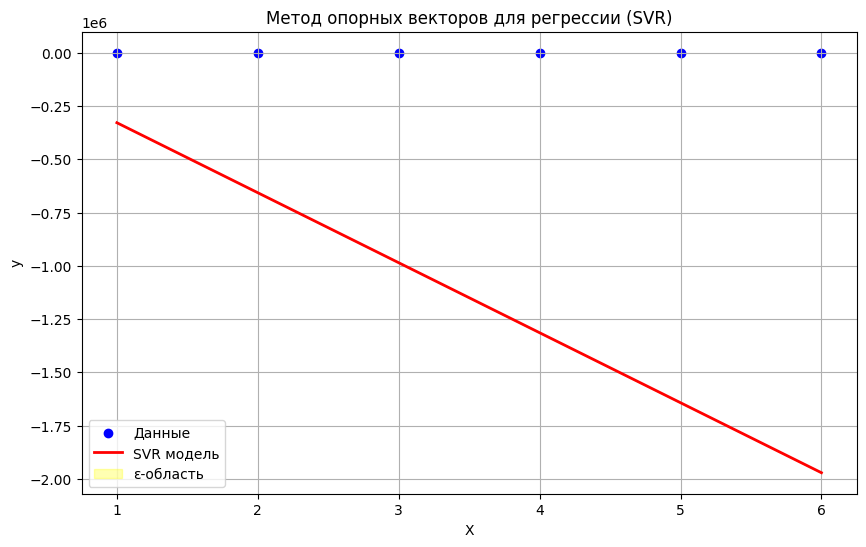

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
X = np.array([[1], [2], [3], [4], [5], [6]])  # Входные данные
y = np.array([2.5, 3.6, 2.9, 5.1, 4.8, 6.2])  # Целевые значения

# Параметры
C = 1.0       # Коэффициент регуляризации
epsilon = 0.5 # Допустимое отклонение

# Функция обучения модели SVR
def svr_train(X, y, C=1.0, epsilon=0.5):
    n = len(y)  # Количество данных
    w = np.zeros(X.shape[1])  # Вектор весов
    b = 0                      # Смещение
    xi = np.zeros(n)          # Ошибки

    # Обучение
    for _ in range(1000):  # Количество итераций
        for i in range(n):
            f_xi = np.dot(w, X[i]) + b  # Предсказанное значение
            if (y[i] - f_xi) > epsilon:
                xi[i] = (y[i] - f_xi) - epsilon
                w += C * (y[i] - f_xi) * X[i]  # Обновление весов
                b += C  # Обновление смещения
            elif (f_xi - y[i]) > epsilon:
                xi[i] = (f_xi - y[i]) - epsilon
                w -= C * (f_xi - y[i]) * X[i]  # Обновление весов
                b -= C  # Обновление смещения
    return w, b

# Обучение модели
w, b = svr_train(X, y, C, epsilon)

# Предсказания
def svr_predict(X, w, b):
    return np.dot(X, w) + b

y_pred = svr_predict(X, w, b)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Данные')
plt.plot(X, y_pred, color='red', label='SVR модель', linewidth=2)

# Область ε
plt.fill_between(X.flatten(), y_pred - epsilon, y_pred + epsilon, color='yellow', alpha=0.3, label='ε-область')
plt.title('Метод опорных векторов для регрессии (SVR)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Давайте теперь решим задачу регрессии с использованием метода опорных векторов (SVR) с помощью готовых библиотек, таких как scikit-learn. Это позволит нам быстро и эффективно получить результаты. Мы также визуализируем результаты.

Для X = 1, предсказанное значение y = 2.3666666666666654
Для X = 2, предсказанное значение y = 3.0999999999999996
Для X = 3, предсказанное значение y = 3.8333333333333344
Для X = 4, предсказанное значение y = 4.566666666666669
Для X = 5, предсказанное значение y = 5.300000000000004
Для X = 6, предсказанное значение y = 6.0333333333333385


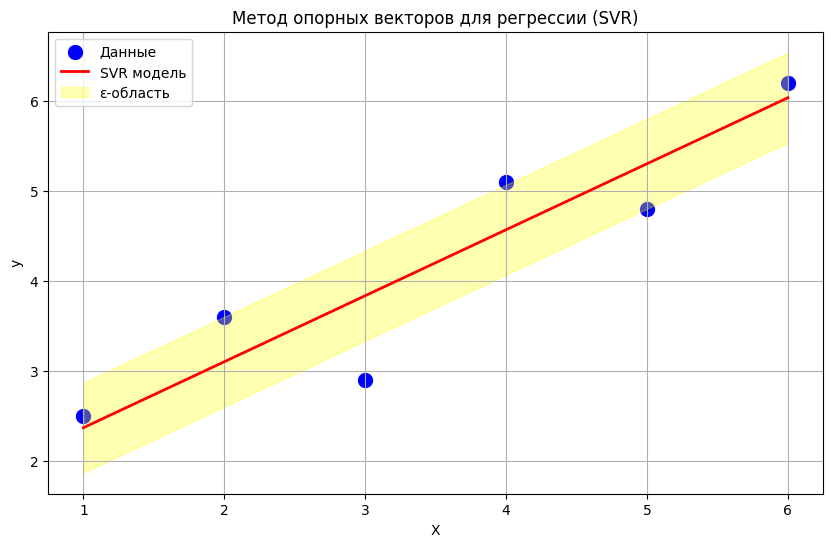

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Генерация данных
X = np.array([[1], [2], [3], [4], [5], [6]])  # Входные данные
y = np.array([2.5, 3.6, 2.9, 5.1, 4.8, 6.2])  # Целевые значения

# Обучение модели SVR
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.5)
svr_model.fit(X, y)

# Предсказания
y_pred = svr_model.predict(X)

# Вывод предсказаний
for i in range(len(X)):
    print(f"Для X = {X[i][0]}, предсказанное значение y = {y_pred[i]}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Данные', s=100)
plt.plot(X, y_pred, color='red', label='SVR модель', linewidth=2)

# Область ε
epsilon = 0.5
plt.fill_between(X.flatten(), y_pred - epsilon, y_pred + epsilon, color='yellow', alpha=0.3, label='ε-область')
plt.title('Метод опорных векторов для регрессии (SVR)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()